# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
# insert code here
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# implementing pca to determine number of components
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [7]:
# implement explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [8]:
explained_variance_ratio

array([1.78248763e-01, 1.31423463e-01, 1.03428992e-01, 8.93001375e-02,
       7.00271587e-02, 6.26207004e-02, 5.53463463e-02, 5.16479599e-02,
       4.98606225e-02, 4.86667259e-02, 4.67744196e-02, 4.42653499e-02,
       4.16638974e-02, 2.67254645e-02, 4.89685831e-33, 3.16068688e-33,
       2.25237610e-33, 1.99911215e-33, 1.58621238e-33, 3.26439474e-34])

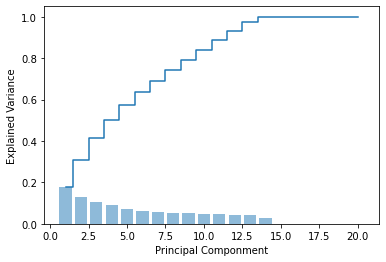

In [9]:
cum_var_exp = np.cumsum(explained_variance_ratio)
plt.bar(range(1,21), explained_variance_ratio, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

> Describe your results here

**In the above cells I have done the following:-**
- I have done the standard scaling for features both for training and testing dataset.
- Then, I have implemented PCA to determine number of components.
- After which, I have found the explained variance ratio for the PCA. When this value is higher, it indicates that it is a more informative content and cumulative sum of this determines number of components to be used for dimensionality reduction.
- Then, I have plotted the cumulative sum of explained variance ratio to determine number of components which can be found by taking the point where the elbow of the curve stops increasing. Here, in the above plot stops increasing when number of components is approximately 14. So, I can say that 14 components are required for dimensionality reduction.

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [10]:
# Insert code here
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

## Visualizing the target column distribution

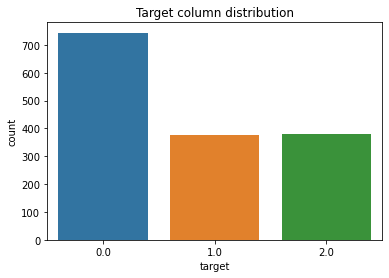

In [11]:
import seaborn as sns

sns.countplot(x='target', data=df)
plt.title('Target column distribution')
plt.show()

> Describe your results here

**In the above cells, I have done the following:-**
- I have got the value counts of target column, 0.0 with 744, 2.0 wit 380 and 1.0 with 376 which means the target column is unbalanced. It is multi-class column.
- I have also plotted the target column distribution using countplot. 1.0 and 2.0 have same value distribution whereas 3.0 has the distribution double of 1.0 and 2.0 value distribution.

**To evaluate a predictive model (this is multi-class classifier) the following methods can be used:-**
- Accuracy
- Confusion Matrix
- Precision (average is weighted because of multi-class)
- Recall (average is weighted because of multi-class)
- F1 score (average is weightedbecause of multi-class)
- Classification Report
- Cross Validation

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [12]:
# Insert code here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

lr = LogisticRegression()
lr.fit(X_train_std, y_training)

LogisticRegression()

## Evaluation of training data 

In [13]:
y_train_predictions = lr.predict(X_train_std)

In [14]:
y_train_predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [15]:
accuracy = accuracy_score(y_training, y_train_predictions)
accuracy

0.725

In [16]:
precision = precision_score(y_training, y_train_predictions, average='weighted')
precision

0.723809671877416

In [17]:
recall = recall_score(y_training, y_train_predictions, average='weighted')
recall

0.725

In [18]:
print(classification_report(y_training, y_train_predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       591
         1.0       0.72      0.62      0.66       302
         2.0       0.70      0.66      0.68       307

    accuracy                           0.73      1200
   macro avg       0.72      0.70      0.71      1200
weighted avg       0.72      0.72      0.72      1200



## Evaluation of testing data

In [19]:
y_test_predictions = lr.predict(X_test_std)

In [20]:
y_test_predictions

array([0., 2., 2., 1., 0., 2., 2., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 2., 2., 2., 0., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 2., 0.,
       2., 2., 1., 1., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       1., 1., 0., 2., 2., 1., 1., 2., 2., 1., 2., 0., 2., 0., 2., 0., 0.,
       2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 2., 1., 1., 0., 1., 0.,
       2., 0., 0., 0., 2., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 2., 0.,
       1., 1., 0., 0., 1., 0., 2., 1., 0., 0., 1., 2., 1., 0., 0., 1., 2.,
       0., 2., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 2., 0., 0., 2., 2.,
       0., 1., 0., 1., 0., 0., 2., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 1., 2., 0., 1., 1., 1., 2., 2., 0., 2., 1., 2.,
       1., 1., 0., 0., 0., 0., 1., 2., 2., 2., 0., 0., 2., 0., 0., 0., 0.,
       2., 2., 1., 2., 0., 0., 0., 1., 0., 0., 0., 2., 1., 2., 0., 2., 0.,
       2., 1., 2., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 2.,
       0., 1., 0., 0., 0.

In [21]:
accuracy = accuracy_score(y_test, y_test_predictions)
accuracy

0.7033333333333334

In [22]:
precision = precision_score(y_test, y_test_predictions, average='weighted')
precision

0.7040254342431762

In [23]:
recall = recall_score(y_test, y_test_predictions, average='weighted')
recall

0.7033333333333334

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



> Describe results here

**In the above cells, I have done the following:-**
- Created logistic regression model.
- Fit the model with the training data.
- Get the predictions of training data.
- Evaluate the model for training data
    - Accuracy of training data is 72.5
    - Precision score of training data is 72.3
    - Recall score of training data is 72.5
- Evalute the model for testing data
    - Accuracy of testing data is 70.3
    - Precision score of testing data is 70.4
    - Recall score of testing data is 70.3

**From the above results, I can say that this model has an accuarcy of 72 and 70 for training and testing data 
respectively which means it might be a good fit for this data not a best fit. This model is slightly overfitted.**

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [25]:
# Insert code
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [26]:
p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

df_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
df_search = df_search.fit(X_train, y_training)

df_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=0.1))])

## Evaluation of training data

In [27]:
y_train_predictions = df_search.predict(X_train)
y_train_predictions

array([1., 0., 0., ..., 0., 2., 0.])

In [28]:
accuracy = accuracy_score(y_training, y_train_predictions)
accuracy

0.725

In [29]:
precision = precision_score(y_training, y_train_predictions, average='weighted')
precision

0.7233506696572418

In [30]:
recall = recall_score(y_training, y_train_predictions, average='weighted')
recall

0.725

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_training, y_train_predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       591
         1.0       0.71      0.60      0.65       302
         2.0       0.71      0.66      0.68       307

    accuracy                           0.73      1200
   macro avg       0.72      0.69      0.70      1200
weighted avg       0.72      0.72      0.72      1200



## Evaluation of testing data

In [32]:
y_test_predictions = df_search.predict(X_test)
y_test_predictions

array([0., 2., 2., 1., 0., 2., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 2., 2., 0., 0., 2., 2., 0., 0., 1., 2., 2., 2., 2., 0., 2., 0.,
       0., 2., 1., 1., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.,
       1., 1., 0., 2., 2., 1., 1., 2., 1., 1., 2., 0., 2., 0., 2., 0., 0.,
       2., 0., 2., 0., 0., 1., 0., 0., 0., 1., 0., 2., 1., 1., 0., 1., 0.,
       2., 0., 0., 0., 2., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 2., 0.,
       2., 1., 0., 0., 1., 0., 2., 1., 0., 0., 1., 2., 1., 0., 0., 1., 2.,
       0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2., 2.,
       0., 1., 0., 1., 0., 0., 2., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 1., 0., 0., 1., 1., 1., 2., 2., 0., 2., 0., 2.,
       1., 1., 0., 0., 0., 0., 1., 2., 2., 2., 0., 0., 2., 0., 0., 0., 0.,
       2., 2., 1., 2., 0., 0., 0., 0., 0., 0., 2., 2., 1., 2., 1., 2., 0.,
       0., 1., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2.,
       0., 1., 0., 0., 0.

In [33]:
accuracy = accuracy_score(y_test, y_test_predictions)
accuracy

0.6866666666666666

In [34]:
precision = precision_score(y_test, y_test_predictions, average='weighted')
precision

0.6838285714285713

In [35]:
recall = recall_score(y_test, y_test_predictions, average='weighted')
recall

0.6866666666666666

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       153
         1.0       0.63      0.54      0.58        74
         2.0       0.64      0.66      0.65        73

    accuracy                           0.69       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.68      0.69      0.68       300



> Describe your results here

**In the above cells, I have done the following:-**
- Created logistic regression model pipeline, also implemented PCA and also used GridSearchCV for model implementation.
- Fit the model with the training data.
- Get the predictions of training data.
- Evaluate the model for training data
    - Accuracy of training data is 72.5
    - Precision score of training data is 72.3
    - Recall score of training data is 72.5
- Evalute the model for testing data
    - Accuracy of testing data is 69
    - Precision score of testing data is 68.3
    - Recall score of testing data is 68.6

**From the above results, I can say that this model has an accuarcy of 72 and 69 for training and testing data 
respectively which means it might be a good fit for this data not a best fit. This model is slightly overfitted.
Original logistic regression model performs better than this model.**

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [37]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_training)

DecisionTreeClassifier()

## Evaluation of training data

In [39]:
y_train_predictions = dt.predict(X_train_std)
y_train_predictions

array([1., 0., 0., ..., 2., 2., 0.])

In [40]:
accuracy = accuracy_score(y_training, y_train_predictions)
accuracy

1.0

In [41]:
precision = precision_score(y_training, y_train_predictions, average='weighted')
precision

1.0

In [42]:
recall = recall_score(y_training, y_train_predictions, average='weighted')
recall

1.0

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_training, y_train_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       591
         1.0       1.00      1.00      1.00       302
         2.0       1.00      1.00      1.00       307

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



## Evaluation of testing data

In [44]:
y_test_predictions = dt.predict(X_test_std)
y_test_predictions

array([0., 2., 1., 0., 0., 2., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 2., 2., 0., 2., 1., 2., 0., 1., 1., 1., 2., 2., 1., 1., 2., 0.,
       2., 1., 1., 1., 2., 2., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 2., 0., 2., 1., 0., 0., 1., 2., 0., 0., 1., 0., 0., 2.,
       2., 2., 2., 0., 0., 1., 2., 2., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
       0., 0., 2., 1., 2., 0., 1., 0., 2., 1., 1., 1., 0., 1., 0., 0., 1.,
       2., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 2., 2.,
       0., 0., 2., 0., 0., 0., 2., 0., 0., 2., 2., 0., 0., 0., 0., 2., 2.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 2., 2., 0., 2.,
       1., 0., 0., 0., 2., 1., 1., 0., 0., 2., 2., 2., 0., 2., 2., 0., 2.,
       1., 2., 0., 0., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 0., 0., 0.,
       2., 0., 0., 2., 0., 2., 1., 1., 2., 2., 2., 1., 1., 1., 0., 2., 0.,
       2., 1., 2., 0., 2., 0., 0., 1., 2., 1., 2., 0., 0., 1., 2., 2., 0.,
       0., 0., 0., 0., 0.

In [45]:
accuracy = accuracy_score(y_test, y_test_predictions)
accuracy

0.66

In [46]:
precision = precision_score(y_test, y_test_predictions, average='weighted')
precision

0.6735757575757575

In [47]:
recall = recall_score(y_test, y_test_predictions, average='weighted')
recall

0.66

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       153
         1.0       0.56      0.66      0.60        74
         2.0       0.60      0.66      0.63        73

    accuracy                           0.66       300
   macro avg       0.64      0.66      0.65       300
weighted avg       0.67      0.66      0.66       300



> Describe results here

**In the above cells, I have done the following:-**
- Created decision tree classifier model.
- Fit the model with the training data.
- Get the predictions of training data.
- Evaluate the model for training data
    - Accuracy of training data is 100
    - Precision score of training data is 100
    - Recall score of training data is 100
- Evalute the model for testing data
    - Accuracy of testing data is 66
    - Precision score of testing data is 67
    - Recall score of testing data is 66

**From the above results, I can say that this model has an accuarcy of 100 and 66 for training and testing data 
respectively which means it is not a good fit for this data because it is overfitted (performs very well on training data and not on testing data).**

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [49]:
# Insert code here
p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', DecisionTreeClassifier())
             ])

param_grid = [
  {'model__max_depth': [2, 5, 10],
   'model__min_samples_split':[3, 5, 10],
   'model__min_samples_leaf': [2, 5],
   'model__class_weight':[None]
  }
 ]

dt_gcv_results = GridSearchCV(estimator=p, 
                           param_grid=param_grid, scoring='accuracy', refit=True)

dt_gcv_results = dt_gcv_results.fit(X_train, y_training)
dt_gcv_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=10))])

In [50]:
y_train_predictions = dt_gcv_results.predict(X_train)
y_train_predictions

array([1., 0., 0., ..., 2., 2., 0.])

In [51]:
accuracy = accuracy_score(y_training, y_train_predictions)
accuracy

0.9116666666666666

In [52]:
precision = precision_score(y_training, y_train_predictions, average='weighted')
precision

0.9118742056980733

In [53]:
recall = recall_score(y_training, y_train_predictions, average='weighted')
recall

0.9116666666666666

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_training, y_train_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       591
         1.0       0.91      0.84      0.87       302
         2.0       0.92      0.87      0.90       307

    accuracy                           0.91      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.91      0.91      0.91      1200



In [55]:
y_test_predictions = dt_gcv_results.predict(X_test)
y_test_predictions

array([0., 2., 1., 0., 0., 2., 2., 0., 0., 1., 1., 0., 1., 0., 1., 0., 2.,
       0., 2., 2., 1., 2., 2., 2., 0., 1., 1., 2., 2., 2., 1., 0., 0., 0.,
       2., 0., 1., 1., 0., 2., 0., 0., 2., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 2., 2., 2., 0., 0., 2., 2., 0., 0., 0., 0., 2., 0., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 2., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 2., 1., 1., 0., 1., 0., 2., 1., 2., 1., 0., 0., 0., 2., 1.,
       2., 0., 1., 0., 0., 0., 1., 1., 1., 1., 2., 2., 1., 0., 1., 1., 2.,
       0., 1., 2., 1., 2., 0., 1., 0., 0., 2., 2., 0., 0., 0., 2., 2., 2.,
       0., 0., 0., 1., 0., 2., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 1., 1., 2., 0., 2., 0., 0., 2.,
       1., 2., 0., 2., 0., 0., 1., 2., 1., 2., 2., 0., 0., 0., 0., 0., 1.,
       2., 2., 2., 2., 0., 0., 1., 0., 1., 2., 2., 2., 1., 1., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [56]:
accuracy = accuracy_score(y_test, y_test_predictions)
accuracy

0.7233333333333334

In [57]:
precision = precision_score(y_test, y_test_predictions, average='weighted')
precision

0.723493714565261

In [58]:
recall = recall_score(y_test, y_test_predictions, average='weighted')
recall

0.7233333333333334

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       153
         1.0       0.72      0.58      0.64        74
         2.0       0.65      0.70      0.67        73

    accuracy                           0.72       300
   macro avg       0.71      0.69      0.70       300
weighted avg       0.72      0.72      0.72       300



> Describe your results here

**In the above cells, I have done the following:-**
- Created decision tree classifier model pipeline, also implemented PCA and also used GridSearchCV for model implementation.
- Fit the model with the training data.
- Get the predictions of training data.
- Evaluate the model for training data
    - Accuracy of training data is 91
    - Precision score of training data is 91
    - Recall score of training data is 91
- Evalute the model for testing data
    - Accuracy of testing data is 72
    - Precision score of testing data is 72
    - Recall score of testing data is 72

**From the above results, I can say that this model has an accuarcy of 91 and 73 for training and testing data 
respectively which means it might be a good fit for this data not a best fit. This model is overfitted.
Original logistic regression model and logistic regression model using pca is slightly overfitted. But decision tree and decision tree using pca is more overfitted. I prefer logistic regression models from decision tree models because it is essentially required that the model should perform better on unseen data, when there is high rate of overfitting, it might not be possible to perform better on unseen data.**